# Логистическая регрессия
### Основная идея
Логистическая регрессия используется для задач классификации.
В отличие от линейной регрессии, которая предсказывает непрерывные значения, лог. регрессия предсказывает *вероятность* принадлежности к классу 1, а затем принимает решение о классе на основе порога (обычно 0.5).

*Пример*
Предположим, что у нас есть данные о пациентах:
- Признаки: возраст, давление.
- Целевая переменная: болен (1) или здоров (0).

Логистическая регрессия поможет предсказать вероятность болезни на основе признаков и классифицировать пациента как больного или здорового.

## Математическая модель
### Линейная комбинация
$$
z = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{k}x_{k} = w^{T}x
$$
где:
- $ x = [1, x_{1}, x_{2}, ..., x_{k}] - вектор признаков (с добавлением 1 для w_{0})$
- w = [w_{0}, w_{1}, ..., w_{k}] - вектор параметров
### Сигмоидная функция
Чтобы получить вероятность, мы пропускаем z через сигмоидную фнкцию:
$$ P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}} $$
- $\sigma(z) всегда возвращает значение в диапазоне [0, 1], что интерпретируется как вероятность.$
- Если $ z → +∞, то \sigma(z) → 1; если z → -∞, то \sigma(z) → 0.$
Вероятность принадлежности к классу 0:
$$ P(y=0|x) = 1 - P(y = 1|x) = 1 - \sigma(z) $$

### Классификация

Для классификации выбираем порог (обычно 0.5):
- Если $P(y = 1|x) >= 0.5$, предсказываем 1.
- Если $P(y = 1|x) < 0.5$, предсказываем 0.
Поскольку $\sigma(z) = 0.5 при z = 0$, это соответсвует правилу:
- Если $w^{T}x >= 0$, класс 1.
- Если $w^{T}x < 0$, класс 0.
### Функция потерь: Логарифмическая потеря (Log Loss)
Для логистической регрессии мы не можем использовать MSE, как в линейной регрессии, потому что:

Выход модели — вероятность, а не непрерывное значение.
MSE не выпукла для сигмоидной функции, что затрудняет оптимизацию.
Вместо этого используется логарифмическая потеря (log loss), также известная как кросс-энтропия:
..

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 2) # Два признака
true_w = np.array([1.5, -2.0]) # Истинные коэффициенты
true_w0 = 0.5 # Истинный свободный член

# Линейная комбинация + Шум
z = true_w0 + X @ true_w + np.random.rand(n_samples) * 0.5
probabilities = 1 / (1 + np.exp(-z)) # Сигмоида
y = (probabilities >= 0.5).astype(int) # Классы 0 или 1

In [7]:
# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
# Логистическая регрессия с градиентным спуском
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000, tol=1e-5):
    # Добавляем столбец единиц для w_0
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    n = X.shape[0]
    w = np.zeros(X_with_bias.shape[1])  # [w_0, w_1, w_2]
    losses = []
    
    for i in range(num_iterations):
        # Предсказания (вероятности)
        z = X_with_bias @ w
        p = sigmoid(z)
        
        # Градиент
        gradient = (1/n) * X_with_bias.T @ (p - y)
        
        # Обновление параметров
        w -= learning_rate * gradient
        
        # Логарифмическая потеря
        loss = -np.mean(y * np.log(p + 1e-10) + (1 - y) * np.log(1 - p + 1e-10))
        losses.append(loss)
        
        # Проверка сходимости
        if i > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Сходимость достигнута на итерации {i+1}")
            break
        
        if (i + 1) % 100 == 0:
            print(f"Итерация {i+1}, Log Loss: {loss:.4f}")
    
    return w, losses

In [29]:
# Обучаем модель
w, losses = logistic_regression(X, y, learning_rate=0.1, num_iterations=1000)

Итерация 100, Log Loss: 0.4650
Итерация 200, Log Loss: 0.4073
Итерация 300, Log Loss: 0.3649
Итерация 400, Log Loss: 0.3328
Итерация 500, Log Loss: 0.3079
Итерация 600, Log Loss: 0.2881
Итерация 700, Log Loss: 0.2719
Итерация 800, Log Loss: 0.2585
Итерация 900, Log Loss: 0.2471
Итерация 1000, Log Loss: 0.2374


In [30]:
# Выводим параметры
print(f"Параметры w_0 = {w[0]:.4f}, w_1 = {w[1]:.4f}, w_2 = {w[2]:.4f}")

Параметры w_0 = 1.4877, w_1 = 3.8426, w_2 = -3.4309


In [31]:
# Предсказания
X_with_bias = np.c_[np.ones(X.shape[0]), X]
probabilities = sigmoid(X_with_bias @ w)
y_pred = (probabilities >= 0.5).astype(int)

In [32]:
# Точность
accuracy = np.mean(y_pred == y)
print(f"Точность: {accuracy:.4f}")

Точность: 0.9300


In [ ]:
# Визуализация
plt.figure(figsize=(12, 5))

# График 1: Данные и разделяющая линия
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс 1')

# Разделяющая линия: w_0 + w_1 x_1 + w_2 x_2 = 0
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(w[0] + w[1] * x1) / w[2]
plt.plot(x1, x2, color='green', label='Разделяющая линия')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Логистическая регрессия')
plt.legend()

# График 2: Функция потерь
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Итерация')
plt.ylabel('Log Loss')
plt.title('Изменение функции потерь')
plt.show()

# Логистическая регрессия с scikit-learn

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [38]:
# Параметры
print(f"Параметры: w_0 = {model.intercept_[0]:.4f}, w_1 = {model.coef_[0, 0]:.4f}, w_2 = {model.coef_[0, 1]:.4f}")

Параметры: w_0 = 1.6467, w_1 = 2.7431, w_2 = -2.9341


In [41]:
# Предсказания
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Точность {accuracy:.4f}")

Точность 0.9000


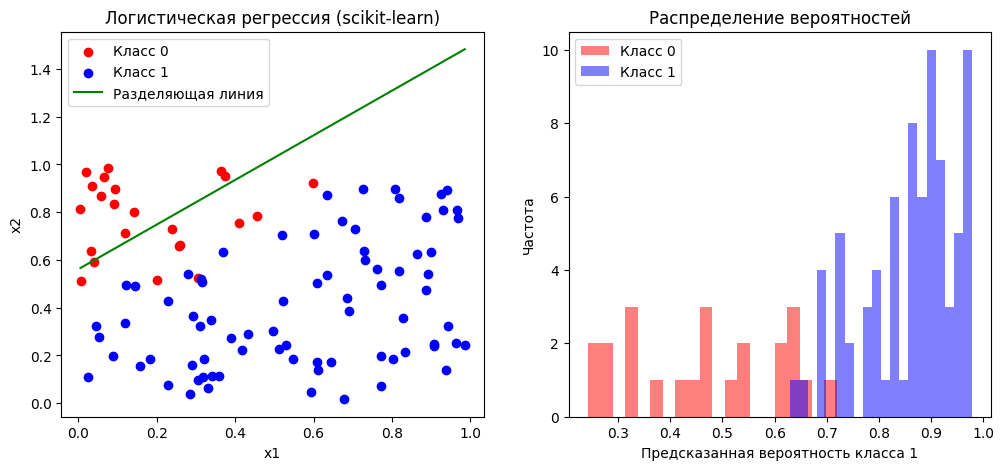

In [42]:
# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс 1')

# Разделяющая линия
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(model.intercept_[0] + model.coef_[0, 0] * x1) / model.coef_[0, 1]
plt.plot(x1, x2, color='green', label='Разделяющая линия')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Логистическая регрессия (scikit-learn)')
plt.legend()

plt.subplot(1, 2, 2)
probabilities_sklearn = model.predict_proba(X)[:, 1]
plt.hist(probabilities_sklearn[y == 0], bins=20, alpha=0.5, color='red', label='Класс 0')
plt.hist(probabilities_sklearn[y == 1], bins=20, alpha=0.5, color='blue', label='Класс 1')
plt.xlabel('Предсказанная вероятность класса 1')
plt.ylabel('Частота')
plt.title('Распределение вероятностей')
plt.legend()
plt.show()

# Логистическая регрессия с регуляризацией

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (398, 30)
Размер тестовой выборки: (171, 30)


In [14]:
# модель без регуляризации
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

# предсказания
y_pred_tain = model.predict(X_train)
y_pred_test = model.predict(X_test)

# оценка
print(f'Точность на обучающей выборке: {accuracy_score(y_train, y_pred_tain):.4f}')
print(f'Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test):.4f}')
print('\nКлассификационный отчёт (тестовая выборка):')
print(classification_report(y_test, y_pred_test, target_names=['Доброкачественная', 'Злокачественная']))

Точность на обучающей выборке: 0.9874
Точность на тестовой выборке: 0.9825

Классификационный отчёт (тестовая выборка):
                   precision    recall  f1-score   support

Доброкачественная       0.97      0.98      0.98        63
  Злокачественная       0.99      0.98      0.99       108

         accuracy                           0.98       171
        macro avg       0.98      0.98      0.98       171
     weighted avg       0.98      0.98      0.98       171



### L2 - регуляризация (Ridge)
L2 - регуляризация добавляет штраф на сумму квадратов весов:
$$ J(w) = -\frac{1}{n}\sum^{n}_{i=1}[y_{i}\log(\hat{p_{i}}) + (1 - y_{i})\log{(1 - \hat{p_{i}})}] + \frac{1}{C}\sum^{k}_{j=1}w^{2}_{j} $$
$ \frac{1}{C} $ - коэффициент регуляризации (меньше С, сильнее регуляризация).

In [15]:
# модель с регуляризацией
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)


# предсказания
y_pred_train_l2 = model_l2.predict(X_train)
y_pred_test_l2 = model_l2.predict(X_test)

# оценка
print("L2-регуляризация:")
print(f'Точность на обучающей выборке: {accuracy_score(y_train, y_pred_train_l2):.4f}')
print(f'Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test_l2):.4f}')
print('\nКлассификационный отчёт (тестовая выборка):')
print(classification_report(y_test, y_pred_test_l2, target_names=['Доброкачественная', 'Злокачественная']))

L2-регуляризация:
Точность на обучающей выборке: 0.9874
Точность на тестовой выборке: 0.9825

Классификационный отчёт (тестовая выборка):
                   precision    recall  f1-score   support

Доброкачественная       0.97      0.98      0.98        63
  Злокачественная       0.99      0.98      0.99       108

         accuracy                           0.98       171
        macro avg       0.98      0.98      0.98       171
     weighted avg       0.98      0.98      0.98       171



### L1-регуляризация (Lasso)
$$ J(w) = -\frac{1}{n}[y_{i}\log{(\hat{p_{i}})} + (1 - y_{i})\log{(1 - \hat{p_{i}})}] + \frac{1}{C}\sum^{k}_{j=1}|w_{j}| $$
L1-регуляризация может обнулять некоторые веса, что плезно для отбора признаков.

In [17]:
# Логистическая регрессия c L1-регуляризацией
model_l1 = LogisticRegression(penalty="l1", C=1.0, solver="liblinear", max_iter=1000)
model_l1.fit(X_train, y_train)

# предсказания
y_pred_train_l1 = model_l1.predict(X_train)
y_pred_test_l1 = model_l1.predict(X_test)

# Оценка
print("L1-регуляризация:")
print(f'Точность на обучающей выборке: {accuracy_score(y_train, y_pred_train_l1):.4f}')
print(f'Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test_l1):.4f}')
print('\nКлассификационный отчёт (тестовая выборка):')
print(classification_report(y_test, y_pred_test_l1, target_names=['Доброкачественная', 'Злокачественная']))

L1-регуляризация:
Точность на обучающей выборке: 0.9874
Точность на тестовой выборке: 0.9825

Классификационный отчёт (тестовая выборка):
                   precision    recall  f1-score   support

Доброкачественная       0.97      0.98      0.98        63
  Злокачественная       0.99      0.98      0.99       108

         accuracy                           0.98       171
        macro avg       0.98      0.98      0.98       171
     weighted avg       0.98      0.98      0.98       171



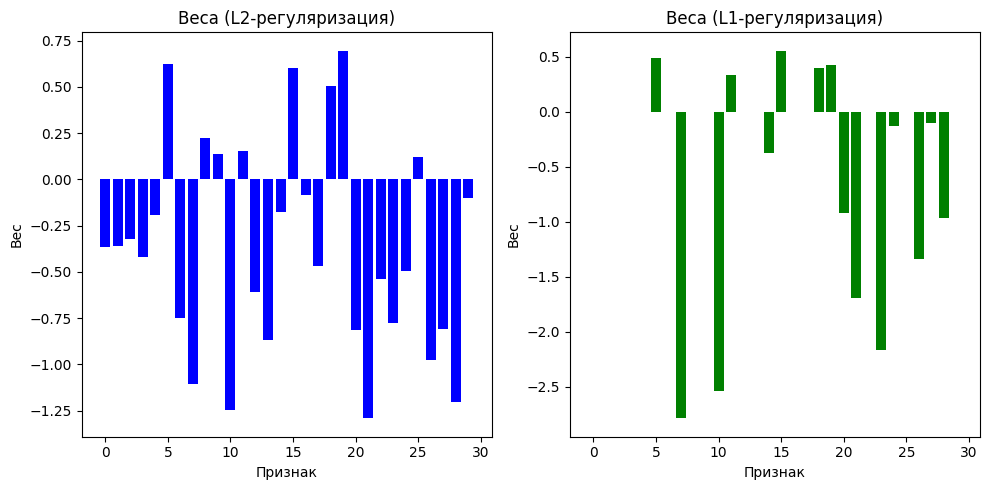

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(model_l2.coef_[0])), model_l2.coef_[0], color='blue')
plt.title('Веса (L2-регуляризация)')
plt.xlabel('Признак')
plt.ylabel('Вес')

plt.subplot(1, 2, 2)
plt.bar(range(len(model_l1.coef_[0])), model_l1.coef_[0], color='green')
plt.title('Веса (L1-регуляризация)')
plt.xlabel('Признак')
plt.ylabel('Вес')
plt.tight_layout()
plt.show()